In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
data = pd.read_csv("Tweets.csv")
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.shape


(14640, 15)

In [4]:
a=data.drop(['tweet_id', 'airline_sentiment_gold','name','negativereason_gold','retweet_count'], axis=1)
a.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [6]:
data['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [7]:
positive=data[data.airline_sentiment=='positive']
positive.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York


In [8]:
positive.airline_sentiment.value_counts()

positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
negative=data[data.airline_sentiment=='negative']
negative.airline_sentiment.value_counts()

negative    9178
Name: airline_sentiment, dtype: int64

In [10]:
neutral=data[data.airline_sentiment=='neutral']
neutral.airline_sentiment.value_counts()

neutral    3099
Name: airline_sentiment, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

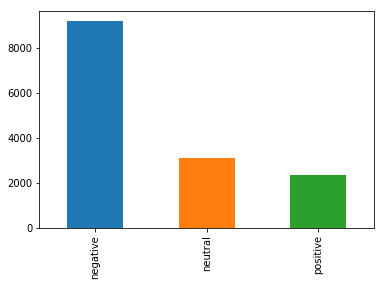

In [14]:
data['airline_sentiment'].value_counts().plot(kind='bar')

In [15]:
data.groupby('airline').size()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
dtype: int64

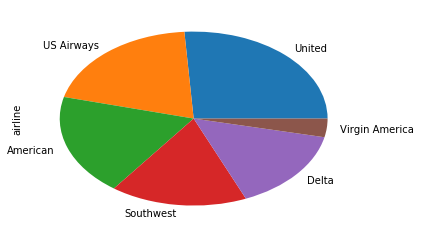

In [16]:
data['airline'].value_counts().plot(kind='pie');

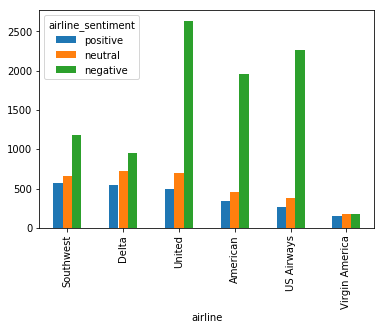

In [17]:
g = data.groupby(['airline_sentiment','airline']).size().unstack('airline_sentiment',fill_value=0)
g = g.sort_values(['positive','neutral','negative'],ascending=False)[['positive','neutral','negative']]
g.plot(kind='bar')

In [18]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

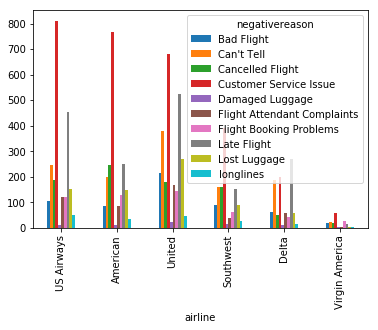

In [19]:
m = data.groupby(['negativereason','airline']).size().unstack('negativereason',fill_value=0)
m = m.sort_values(
    ['Customer Service Issue','Late Flight','Can\'t Tell','Cancelled Flight','Lost Luggage'],
                  ascending=False)
[['Customer Service Issue','Late Flight','Can\'t Tell','Cancelled Flight','Lost Luggage']]
m.plot(kind='bar')

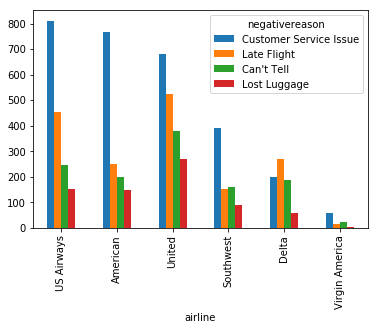

In [20]:
g = data.groupby(['negativereason','airline']).size().unstack('negativereason',fill_value=0)
g = g.sort_values(['Customer Service Issue','Late Flight','Can\'t Tell','Lost Luggage'],
                  ascending=False)[['Customer Service Issue','Late Flight','Can\'t Tell','Lost Luggage']]
g.plot(kind='bar')

In [21]:
a.airline_sentiment_confidence.describe()

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

In [22]:
a.negativereason_confidence.describe()

count    10522.000000
mean         0.638298
std          0.330440
min          0.000000
25%          0.360600
50%          0.670600
75%          1.000000
max          1.000000
Name: negativereason_confidence, dtype: float64

In [23]:
bins=[0.3,0.6,0.9,1]
bin2=[0,0.3,0.6,1]
group_names=['low','average','high']
a['senti_confi']=pd.cut(a['airline_sentiment_confidence'],bins,labels=group_names)
a['nega_confi']=pd.cut(a['negativereason_confidence'],bin2,labels=group_names)
a.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_coord,tweet_created,tweet_location,user_timezone,senti_confi,nega_confi
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),high,NaN
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),low,NaN
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),average,NaN
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),high,high
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),high,high


In [24]:

group_names=['low','average','high']



In [25]:
a.shape


(14640, 12)

In [26]:
a=a.drop(['airline_sentiment_confidence', 'negativereason_confidence','tweet_location',], axis=1)


In [27]:
a.shape

(14640, 9)

In [28]:
#Count vectorization

In [29]:
import pandas as pd
import re
import nltk
import string

stopwords = nltk.corpus.stopwords.words('english')
wn=nltk.WordNetLemmatizer()
airline_company=['virginamerica','american','americanair','delta','southwest','united','virginmedia']

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word.lower() for word in tokens if word not in stopwords]
    text = [word for word in text if word not in airline_company]
    text = [wn.lemmatize(word) for word in text]
    return text



In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(a.text)
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df.head()

,,0,00,0011,0016,006,0162389030167,0162424965446,0162431184663,0167560070877,...,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew,ʖ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(a['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(14640, 15690)
['', '0', '00', '0011', '0016', '006', '0162389030167', '0162424965446', '0162431184663', '0167560070877', '0214', '021mbps', '022015', '0223', '02272015', '02282015', '03', '0303', '03032015', '0316', '0372389047497', '0400', '0510', '0530', '0600', '0638', '0671', '0736', '0769', '0xjareds', '1', '10', '100', '1000', '10000', '10000lbs', '1000cost', '1000p', '1000pm', '1001', '1001pm', '1002', '1005am', '1005pm', '1007', '1007p', '1008', '100pm', '101', '1010', '101030', '1014am', '1015', '1015am', '1016', '1019', '102', '1020', '1020pm', '10215', '1024', '1025', '1027', '1028', '103', '1030', '1030a', '1030pm', '1031', '1032', '1035', '1038', '1039', '104', '1041', '1045', '1045pm', '1046', '105', '1050', '1050am', '1051', '1051pm', '1055', '1055pm', '1058', '106', '1065', '1071', '1074', '1079871763', '108', '1080', '1081', '1086', '108639', '1089', '1098', '1099', '10a', '10am', '10d', '10f', '10hour', '10hrs', '10m', '10min', '10mins', '10minute', '10p', '10pm', '1

In [33]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,00,0011,0016,006,0162389030167,0162424965446,0162431184663,0167560070877,...,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew,ʖ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#feature engineering

In [35]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

a['body_len'] = a['text'].apply(lambda x: len(x) - x.count(" "))
a['punct%'] = a['text'].apply(lambda x: count_punct(x))
a.head()

,airline_sentiment,negativereason,airline,text,tweet_coord,tweet_created,user_timezone,senti_confi,nega_confi,body_len,punct%
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada),high,NaN,32,9.4
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada),low,NaN,64,9.4
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Central Time (US & Canada),average,NaN,60,10.0
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada),high,high,110,6.4
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada),high,high,46,4.3


In [36]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

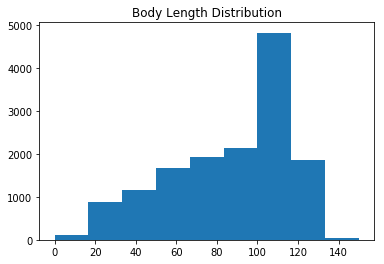

In [37]:
bins = np.linspace(0, 150, 10)
pyplot.hist(a['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

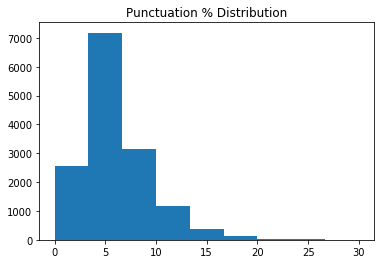

In [38]:
bins = np.linspace(0, 30, 10)

pyplot.hist(a['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

In [39]:
X_features = pd.concat([a['punct%'],a['body_len'],
                        pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,punct%,body_len,0,1,2,3,4,5,6,7,...,15680,15681,15682,15683,15684,15685,15686,15687,15688,15689
0,9.4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.4,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.4,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
XX_features = pd.concat([a['punct%'],a['body_len'],
                        pd.DataFrame(X_counts.toarray())], axis=1)
XX_features.head()

,punct%,body_len,0,1,2,3,4,5,6,7,...,15680,15681,15682,15683,15684,15685,15686,15687,15688,15689
0,9.4,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.4,64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.4,110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [42]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, a['airline_sentiment'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.72984973, 0.68579235, 0.61202186, 0.80806011, 0.77971311])

In [43]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_features, a['airline_sentiment'], test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=15000, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [46]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.03818679903854401, 'body_len'),
 (0.03191805921566045, 'punct%'),
 (0.02570825239217208, 13877),
 (0.023910742283975436, 13869),
 (0.014273124749931929, 13200),
 (0.012425455045185083, 8859),
 (0.010048712076925204, 14846),
 (0.009415691989937792, 6588),
 (0.00923583816336141, 7077),
 (0.009054777960283427, 8330)]

In [47]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred,labels=['negative'])

In [48]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision[0], 3),
                                                        round(recall[0], 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.762 / Recall: 0.955 / Accuracy: 0.752


In [49]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, labels=['negative'])
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision[0], 3), round(recall[0], 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [50]:
for n_est in [10, 100, 150]:
    for depth in [5000,10000 , 15000, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 5000 ---- Precision: 0.747 / Recall: 0.948 / Accuracy: 0.731
Est: 10 / Depth: 10000 ---- Precision: 0.747 / Recall: 0.944 / Accuracy: 0.735
Est: 10 / Depth: 15000 ---- Precision: 0.758 / Recall: 0.943 / Accuracy: 0.738
Est: 10 / Depth: None ---- Precision: 0.752 / Recall: 0.941 / Accuracy: 0.733
Est: 100 / Depth: 5000 ---- Precision: 0.758 / Recall: 0.951 / Accuracy: 0.752
Est: 100 / Depth: 10000 ---- Precision: 0.76 / Recall: 0.953 / Accuracy: 0.753


KeyboardInterrupt: 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10,20],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, a['airline_sentiment'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred,labels=['negative'] )
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision[0], 3), round(recall[0], 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
for n_est in [10, 100, 150]:
    for depth in [5000,10000 , 15000, None]:
        train_RF(n_est, depth)

In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [1, 2], 
    'max_depth': [7, 11, 15],
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_features, a['airline_sentiment'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [1, 2], 
    'max_depth': [7, 11, 15],
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(XX_features, a['airline_sentiment'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
X_train

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

In [ ]:
import time

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred,labels=['negative'] )
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision[0], 3), round(recall[0], 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, labels=['negative'])
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision[0], 3), round(recall[0], 3), round((y_pred==y_test).sum()/len(y_pred), 3)))